# Family and Children's Services Crisis Project by DataCampers
### Objective 2: Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.
- *For the second objective, the columns that contain the information about the documented issues are those that begin with CRISIS Issues. When calls come in, call takers use a form to indicate the various issues the individual is experiencing.*
- *If an individual is experiencing multiple issues, the issues can be grouped together into a single cell, which makes understanding individual issues difficult. For this project you will parse the data from the different CRISIS Issues columns to allow deeper investigation of each individual issue.*

## Self EDA

#### Read in the relevant data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests as re

In [2]:
df1 = pd.read_excel('../data/NSSCrisisv_1.xlsx') # 2020-2021
df2 = pd.read_excel('../data/NSSCrisisv_2.xlsx') # 2022
# df_2020 = pd.read_excel('../data/2020callcenter.xlsx')
# df_2021 = pd.read_excel('../data/2021callcenter.xlsx')
# df_2022 = pd.read_excel('../data/2022callcenter.xlsx')

In [3]:
# Rob: Change name of CRISIS Subjective in v2 to CRISIS Issues to match v1
labels = list()
for col in df2.columns:
    labels.append(col.replace('Subjective', 'Issues'))
df2.columns = labels

In [4]:
# Rob: Drops columns that contain only NaN
df1.dropna(how='all', axis=1, inplace=True)
df2.dropna(how='all', axis=1, inplace=True)

In [5]:
# Rob: Drop columns whose entire values are 98% NaN
# pct_null = df1.isnull().sum() / len(df1)
# missing_features = pct_null[pct_null > 0.98].index
# df1.drop(missing_features, axis=1, inplace=True)

In [6]:
# pct_null = df1.isnull().sum() / len(df1)
# missing_features = pct_null[pct_null > 0.98].index
# df2.drop(missing_features, axis=1, inplace=True)

In [7]:
# Maggie: Find the columns that are the same in both dfs
samecolumnsdf = pd.DataFrame(df1.columns.intersection(df2.columns))
samecolumnsdf

,0
0,CallReportNum
1,ReportVersion
2,LinkedToCallReportNum
3,CallDateAndTimeStart
4,CallDateAndTimeEnd
5,CallLength
6,CallerNum
7,PhoneWorkerNum
8,PhoneWorkerName
9,PostalCode


## Group EDA
We are using these columns in addition to the CRISIS Issues columns:
- CallReportNum, CallDateAndTimeStart, CallDateAndTimeEnd, CallLength, CallerNum

In [8]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col1 = [col for col in df1 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df1_ci = df1[filter_col1]

In [9]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col2 = [col for col in df2 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df2_ci = df2[filter_col2]

### THIS IS THE MASTER DATAFRAME

In [10]:
all_ci = pd.concat([df1_ci, df2_ci])
all_ci

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CRISIS Issues - No presenting problems
0,96627022,2021-12-31 23:35:00,2021-12-31 23:58:00,23,-1,NaN,NaN,Anxious/Stressed; Financial Stress,Employment/Job Placement,NaN,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN
1,96626934,2021-12-31 23:29:00,2021-12-31 23:35:00,6,-1,NaN,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,2021-12-31 23:07:00,2021-12-31 23:28:00,21,1030262,NaN,NaN,Holiday Stress,NaN,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN,NaN
3,96626370,2021-12-31 22:45:00,2021-12-31 22:55:00,10,2479348,NaN,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN,NaN
4,96625909,2021-12-31 22:15:00,2021-12-31 22:44:00,29,-1,NaN,NaN,NaN,Employment/Job Placement,NaN,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,96673255,2022-01-01 20:34:00,2022-01-01 20:58:00,24,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,96645142,2022-01-01 18:27:00,2022-01-01 19:12:00,45,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10645,96640741,2022-01-01 14:44:00,2022-01-01 15:19:00,35,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10646,96849680,2022-01-01 12:09:00,2022-01-01 12:10:00,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information about SOSL support group,NaN


Refresher: ..... **what is the average count of issues per call.**

## Average number of issues per call (by CRISIS category)
- For loop credit: Rob
- I am using this to find the issue count of each cell corresponding to that issue category. Then we can find the average count of issues per call (eg. PARTITION BY all CRISIS Issues) and the average count of each category issue per call (eg. PARTITION BY CRISIS Issue - Abusive Behavior, etc).
- **Run each section from the top to refresh the variables!!**
- lens show how many of those category rows exist (eg. 2505 Abusive Behavior rows out of 63,254)
- sums show total count of the issues count column for that category, will always be >= to lens
- Need to divide these sums by 63,254 to get the avg number of issues for that category per call

1. CRISIS Issues - Abusive Behavior

In [11]:
ci_counts = all_ci['CRISIS Issues - Abusive Behavior'].notnull()

In [12]:
ci_counts = all_ci[ci_counts]

In [13]:
count = []

for x in ci_counts['CRISIS Issues - Abusive Behavior']:
    counter = x.count(";")+1
    count.append(counter)

In [14]:
ci_counts['Issues_Count_AB'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/4004364910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_AB'] = count


In [15]:
len(ci_counts.index)

2505

In [16]:
ci_counts['Issues_Count_AB'].sum()

3656

In [17]:
a=3656/63254 # 0.06 Abusive behavior issues per call

2. CRISIS Issues - Emotional State

In [18]:
ci_counts = all_ci['CRISIS Issues - Emotional State'].notnull()

In [19]:
ci_counts = all_ci[ci_counts]

In [20]:
count = []

for x in ci_counts['CRISIS Issues - Emotional State']:
    counter = x.count(";")+1
    count.append(counter)

In [21]:
ci_counts['Issues_Count_ES'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/4273064899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_ES'] = count


In [22]:
len(ci_counts.index)

42713

In [23]:
ci_counts['Issues_Count_ES'].sum()

98606

In [24]:
b=98606/63254 # 1.56 Emotional state issues per call

3. CRISIS Issues - Financial/Basic Needs

In [25]:
ci_counts = all_ci['CRISIS Issues - Financial/Basic Needs'].notnull()

In [26]:
ci_counts = all_ci[ci_counts]

In [27]:
count = []

for x in ci_counts['CRISIS Issues - Financial/Basic Needs']:
    counter = x.count(";")+1
    count.append(counter)

In [28]:
ci_counts['Issues_Count_FBN'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/1554597162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_FBN'] = count


In [29]:
len(ci_counts.index)

2515

In [30]:
ci_counts['Issues_Count_FBN'].sum()

3523

In [31]:
c=3523/63254 # 0.06 Financial/Basic Needs issues per call

4. CRISIS Issues - Health/Physical

In [32]:
ci_counts = all_ci['CRISIS Issues - Health/Physical'].notnull()

In [33]:
ci_counts = all_ci[ci_counts]

In [34]:
count = []

for x in ci_counts['CRISIS Issues - Health/Physical']:
    counter = x.count(";")+1
    count.append(counter)

In [35]:
ci_counts['Issues_Count_HP'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/3637456233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_HP'] = count


In [36]:
len(ci_counts.index)

5736

In [37]:
ci_counts['Issues_Count_HP'].sum()

7594

In [38]:
d=7594/63254 # 0.12 Health/Physical issues per call

5. CRISIS Issues - Homicide

In [39]:
ci_counts = all_ci['CRISIS Issues - Homicide'].notnull()

In [40]:
ci_counts = all_ci[ci_counts]

In [41]:
count = []

for x in ci_counts['CRISIS Issues - Homicide']:
    counter = x.count(";")+1
    count.append(counter)

In [42]:
ci_counts['Issues_Count_Hom'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/819893445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Hom'] = count


In [43]:
len(ci_counts.index)

58

In [44]:
ci_counts['Issues_Count_Hom'].sum()

72

In [45]:
e=72/63254 # 0.001 Homicide issues per call

6. CRISIS Issues - Information or Services Needed

In [46]:
ci_counts = all_ci['CRISIS Issues - Information or Services Needed'].notnull()

In [47]:
ci_counts = all_ci[ci_counts]

In [48]:
count = []

for x in ci_counts['CRISIS Issues - Information or Services Needed']:
    counter = x.count(";")+1
    count.append(counter)

In [49]:
ci_counts['Issues_Count_ISN'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/137537728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_ISN'] = count


In [50]:
len(ci_counts.index)

2041

In [51]:
ci_counts['Issues_Count_ISN'].sum()

2541

In [52]:
f=2541/63254 # 0.04 Information or Services Needed issues per call

7. CRISIS Issues - Mental Health

In [53]:
ci_counts = all_ci['CRISIS Issues - Mental Health'].notnull()

In [54]:
ci_counts = all_ci[ci_counts]

In [55]:
count = []

for x in ci_counts['CRISIS Issues - Mental Health']:
    counter = x.count(";")+1
    count.append(counter)

In [56]:
ci_counts['Issues_Count_MH'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/928731095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_MH'] = count


In [57]:
len(ci_counts.index)

22253

In [58]:
ci_counts['Issues_Count_MH'].sum()

41546

In [59]:
g=41546/63254 # 0.66 Mental Health issues per call

8. CRISIS Issues - No Issue Call

In [60]:
ci_counts = all_ci['CRISIS Issues - No Issue Call'].notnull()

In [61]:
ci_counts = all_ci[ci_counts]

In [62]:
count = []

for x in ci_counts['CRISIS Issues - No Issue Call']:
    counter = x.count(";")+1
    count.append(counter)

In [63]:
ci_counts['Issues_Count_NIC'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/12750776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_NIC'] = count


In [64]:
len(ci_counts.index)

1519

In [65]:
ci_counts['Issues_Count_NIC'].sum()

1521

In [66]:
h=1521/63254 # 0.02 No Issue Call issues per call

9. CRISIS Issues - Other Description

In [67]:
ci_counts = all_ci['CRISIS Issues - Other Description'].notnull()

In [68]:
ci_counts = all_ci[ci_counts]

In [69]:
count = []

for x in ci_counts['CRISIS Issues - Other Description']:
    counter = x.count(";")+1
    count.append(counter)

In [70]:
ci_counts['Issues_Count_Other'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/2871519774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Other'] = count


In [71]:
len(ci_counts.index)

3407

In [72]:
ci_counts['Issues_Count_Other'].sum()

3477

In [73]:
i=3477/63254 # 0.05 Other Description issues per call

10. CRISIS Issues - Relationships

In [74]:
ci_counts = all_ci['CRISIS Issues - Relationships'].notnull()

In [75]:
ci_counts = all_ci[ci_counts]

In [76]:
count = []

for x in ci_counts['CRISIS Issues - Relationships']:
    counter = x.count(";")+1
    count.append(counter)

In [77]:
ci_counts['Issues_Count_Rel'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/3899193224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Rel'] = count


In [78]:
len(ci_counts.index)

27843

In [79]:
ci_counts['Issues_Count_Rel'].sum()

61546

In [80]:
j=61546/63254 # 0.97 Relationships issues per call

11. CRISIS Issues - Substances

In [81]:
ci_counts = all_ci['CRISIS Issues - Substances'].notnull()

In [82]:
ci_counts = all_ci[ci_counts]

In [83]:
count = []

for x in ci_counts['CRISIS Issues - Substances']:
    counter = x.count(";")+1
    count.append(counter)

In [84]:
ci_counts['Issues_Count_Sub'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/4281212156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Sub'] = count


In [85]:
len(ci_counts.index)

3081

In [86]:
ci_counts['Issues_Count_Sub'].sum()

3901

In [87]:
k=3901/63254 # 0.06 Substances issues per call

12. CRISIS Issues - Suicide

In [88]:
ci_counts = all_ci['CRISIS Issues - Suicide'].notnull()

In [89]:
ci_counts = all_ci[ci_counts]

In [90]:
count = []

for x in ci_counts['CRISIS Issues - Suicide']:
    counter = x.count(";")+1
    count.append(counter)

In [91]:
ci_counts['Issues_Count_Sui'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/502423700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Sui'] = count


In [92]:
len(ci_counts.index)

5151

In [93]:
ci_counts['Issues_Count_Sui'].sum()

6514

In [94]:
l=6514/63254 # 0.10 Suicide issues per call

13. CRISIS Issues - No presenting problems

In [95]:
ci_counts = all_ci['CRISIS Issues - No presenting problems'].notnull()

In [96]:
ci_counts = all_ci[ci_counts]

In [97]:
count = []

for x in ci_counts['CRISIS Issues - No presenting problems']:
    counter = x.count(";")+1
    count.append(counter)

In [98]:
ci_counts['Issues_Count_NPP'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_13820/2370888896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_NPP'] = count


In [99]:
len(ci_counts.index)

234

In [100]:
ci_counts['Issues_Count_NPP'].sum()

234

In [101]:
m=234/63254 # 0.004 No presenting problems issues per call

Making a DataFrame to plot number of CRISIS issues per call by category

In [170]:
CRISIS_Issues = ['Abusive Behavior', 'Emotional State','Financial/Basic Needs','Health/Physical','Homicide','Information/Services Needed','Mental Health','No Issue Call','Other Description','Relationships','Substances','Suicide','No Presenting Problems']
issue_count_by_col = [a,b,c,d,e,f,g,h,i,j,k,l,m]

# icbc = issue count by category
icbc = pd.DataFrame(list(zip(CRISIS_Issues, issue_count_by_col)),
                   columns=['Issue_Category','Number_of_Issues_Per_Call'])
icbc_sorted = icbc.sort_values('Number_of_Issues_Per_Call', ascending=False)
icbc_sorted

,Issue_Category,Number_of_Issues_Per_Call
1,Emotional State,1.558890
9,Relationships,0.972998
6,Mental Health,0.656812
3,Health/Physical,0.120056
11,Suicide,0.102982
10,Substances,0.061672
0,Abusive Behavior,0.057799
2,Financial/Basic Needs,0.055696
8,Other Description,0.054969
5,Information/Services Needed,0.040171


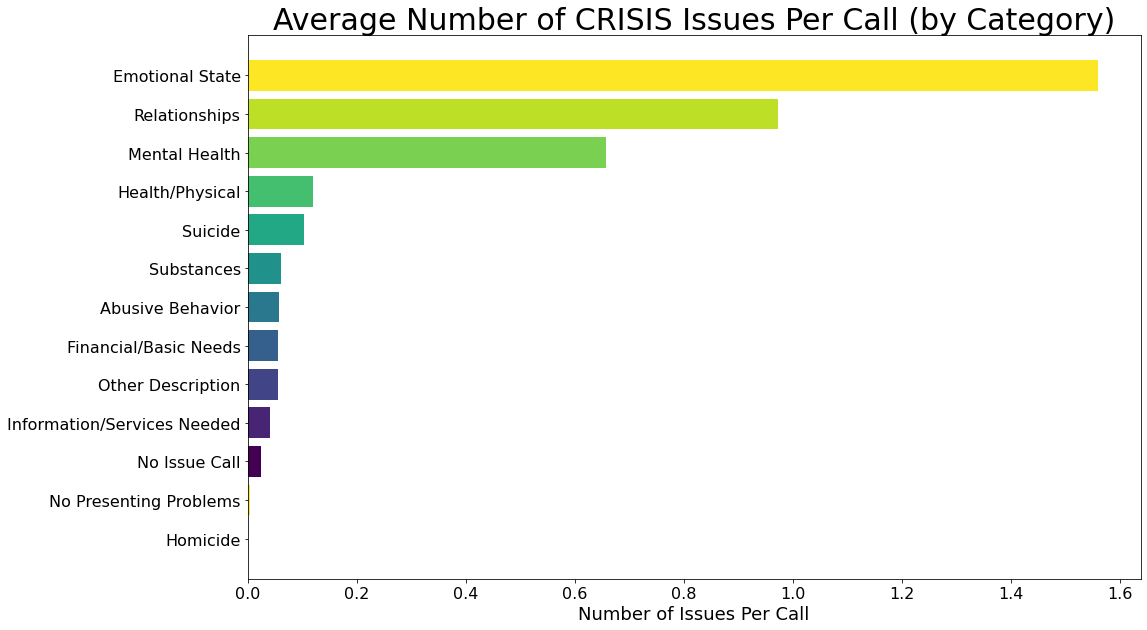

In [103]:
# https://waldyrious.net/viridis-palette-generator/
plt.figure(figsize=(16, 10))
plt.barh(icbc_sorted.Issue_Category, icbc_sorted.Number_of_Issues_Per_Call, color=['#bddf26', '#fde725', '#440154','#482475', '#414487', '#355f8d', '#2a788e', '#21918c', '#22a884', '#44bf70', '#7ad151'])
plt.xticks(rotation = 0, fontsize=16)
plt.xlabel('Number of Issues Per Call', fontsize=18)
#plt.ylabel('CRISIS Issue Category', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average Number of CRISIS Issues Per Call (by Category)', fontsize=30);

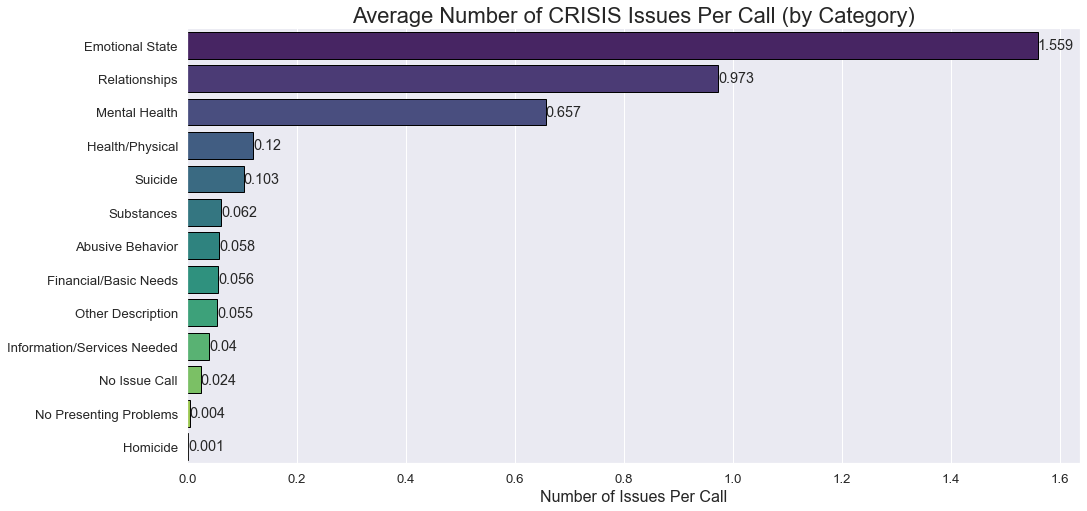

In [189]:
# Above plot but in seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
ax = sns.barplot(x=icbc_sorted.Number_of_Issues_Per_Call.round(3), y=icbc_sorted.Issue_Category, data=icbc_sorted,
            palette=sns.color_palette('viridis', n_colors=13), edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Average Number of CRISIS Issues Per Call (by Category)', fontsize=22)
plt.xlabel('Number of Issues Per Call', fontsize=16)
plt.ylabel('');

## Number of CRISIS Issues (per CRISIS column, 13 total)

In [104]:
# Total number of abusive behavior issues
ab = all_ci['CRISIS Issues - Abusive Behavior'].str.count(';')+1
total_ab = ab.sum()
total_ab

3656.0

In [105]:
# Total number of emotional state issues
es = all_ci['CRISIS Issues - Emotional State'].str.count(';')+1
total_es = es.sum()
total_es

98606.0

In [106]:
# Total number of Financial/Basic Needs issues
fbn = all_ci['CRISIS Issues - Financial/Basic Needs'].str.count(';')+1
total_fbn = fbn.sum()
total_fbn

3523.0

In [107]:
# Total number of Health/Physical issues
hp = all_ci['CRISIS Issues - Health/Physical'].str.count(';')+1
total_hp = hp.sum()
total_hp

7594.0

In [108]:
# Total number of Health/Physical issues
hom = all_ci['CRISIS Issues - Homicide'].str.count(';')+1
total_hom = hom.sum()
total_hom

72.0

In [109]:
# Total number of Information or Services Needed issues
isn = all_ci['CRISIS Issues - Information or Services Needed'].str.count(';')+1
total_isn = isn.sum()
total_isn

2541.0

In [110]:
# Total number of mental health issues
mh = all_ci['CRISIS Issues - Mental Health'].str.count(';')+1
total_mh = mh.sum()
total_mh

41546.0

In [111]:
# Total number of No Issue Call issues
nic = all_ci['CRISIS Issues - No Issue Call'].str.count(';')+1
total_nic = nic.sum()
total_nic

1521.0

In [112]:
# Total number of Other Description issues
od = all_ci['CRISIS Issues - Other Description'].str.count(';')+1
total_od = od.sum()
total_od

3477.0

In [113]:
# Total number of Relationships issues
rel = all_ci['CRISIS Issues - Relationships'].str.count(';')+1
total_rel = rel.sum()
total_rel

61546.0

In [114]:
# Total number of Substances issues
sub = all_ci['CRISIS Issues - Substances'].str.count(';')+1
total_sub = sub.sum()
total_sub

3901.0

In [115]:
# Total number of Suicide issues
sui = all_ci['CRISIS Issues - Suicide'].str.count(';')+1
total_sui = sui.sum()
total_sui

6514.0

In [116]:
# Total number of No presenting problems issues
npp = all_ci['CRISIS Issues - No presenting problems'].str.count(';')+1
total_npp = npp.sum()
total_npp

234.0

In [117]:
# Making the DataFrame
num_issues_list = [total_ab, total_es, total_fbn, total_hp, total_hom, total_isn, total_mh, total_nic, total_od, total_rel, total_sub, total_sui, total_npp]
cri_issues_list = ['Abusive Behavior', 'Emotional State', 'Financial/Basic Needs', 'Health/Physical', 'Homicide', 'Info/Service Needed', 'Mental Health', 'No Issue', 'Other', 'Relationships', 'Substances', 'Suicide', 'No Presenting Problems']
issue_count_df = pd.DataFrame(list(zip(cri_issues_list, num_issues_list)),
    columns =['CRISIS_Issue', 'Number_of_Issues'])
issue_count_df

,CRISIS_Issue,Number_of_Issues
0,Abusive Behavior,3656.0
1,Emotional State,98606.0
2,Financial/Basic Needs,3523.0
3,Health/Physical,7594.0
4,Homicide,72.0
5,Info/Service Needed,2541.0
6,Mental Health,41546.0
7,No Issue,1521.0
8,Other,3477.0
9,Relationships,61546.0


In [118]:
issue_count_df = issue_count_df.sort_values('Number_of_Issues', ascending=True)
issue_count_df

,CRISIS_Issue,Number_of_Issues
4,Homicide,72.0
12,No Presenting Problems,234.0
7,No Issue,1521.0
5,Info/Service Needed,2541.0
8,Other,3477.0
2,Financial/Basic Needs,3523.0
0,Abusive Behavior,3656.0
10,Substances,3901.0
11,Suicide,6514.0
3,Health/Physical,7594.0


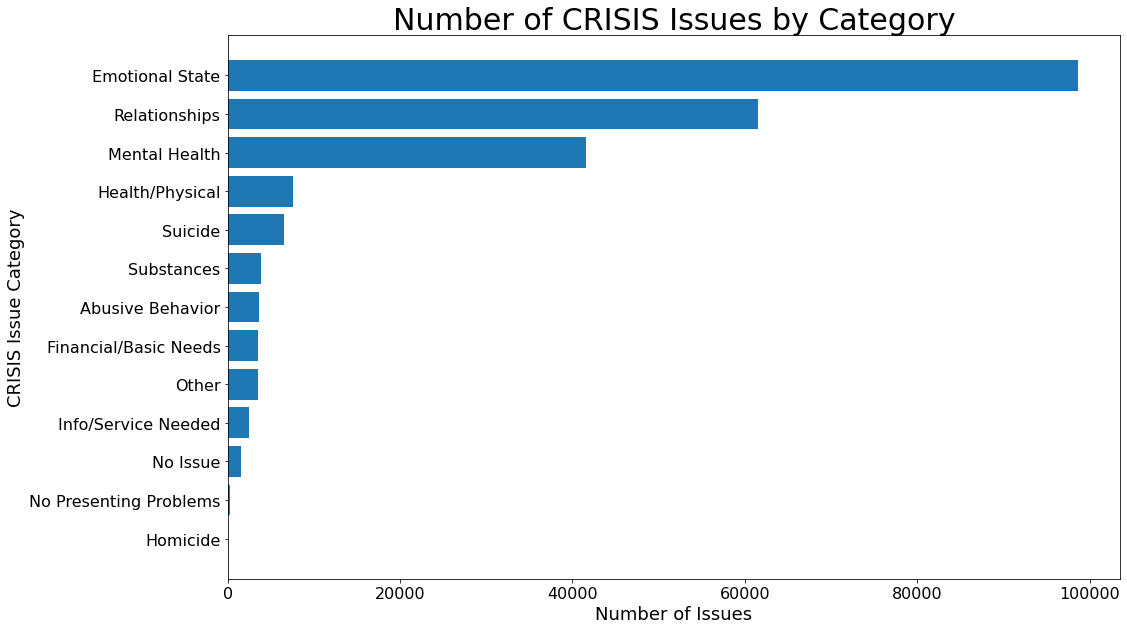

In [119]:
# DO NOT USE THIS
plt.figure(figsize=(16, 10))
plt.barh(issue_count_df.CRISIS_Issue, issue_count_df.Number_of_Issues)
plt.xticks(rotation = 0, fontsize=16)
plt.xlabel('Number of Issues', fontsize=18)
plt.ylabel('CRISIS Issue Category', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Number of CRISIS Issues by Category', fontsize=30);

There are different kinds of issues within each CRISIS category (Y-axis) -- this plot shows the count of all those issues.

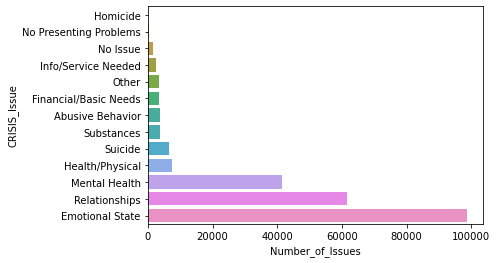

In [120]:
# DO NOT USE THIS
# Barh is gonna be flipped between plt and sns when using the same df
sns.barplot(x = issue_count_df.Number_of_Issues,
            y = issue_count_df.CRISIS_Issue,
            data = issue_count_df);

## Investigating "Content" calls

In [121]:
# Make a df with all the rows where 'CRISIS Issues - Emotional State' is not null (ie. has values)
all_ci_content = all_ci['CRISIS Issues - Emotional State'].notnull()

In [122]:
# Print to check, run this AFTER the above
all_ci_content = all_ci[all_ci_content]

In [123]:
# Filter rows to only those that only contain 'Content' in the Emotional State column
content = all_ci_content.loc[all_ci_content['CRISIS Issues - Emotional State'].isin(['Content'])]

In [124]:
content['CallerNum'].value_counts()[:10].sort_values(ascending=False)
# Content callers: More repeat callers than random (-1)

-1          1040
 1155260     298
 1033478     234
 1031947     229
 3620809     164
 1025380     145
 3346390     126
 1802329      72
 2270935      68
 3769693      46
Name: CallerNum, dtype: int64

In [125]:
content['CRISIS Issues - Relationships'].value_counts()[:10].sort_values(ascending=False)
# Content callers: Most reported relationship is family

Family                                    135
Other Relationships                        63
Family; Other Relationships                52
Family; Peer Group/Friend                  44
Peer Group/Friend                          36
Animal/Pet                                 32
Family; Therapist/Medical Doctor           30
Crisis Counselor                           29
Therapist/Medical Doctor                   26
Peer Group/Friend; Other Relationships     23
Name: CRISIS Issues - Relationships, dtype: int64

In [126]:
content['CallLength'].value_counts()[:10].sort_values(ascending=False)
# Content callers: 10 min calls top the list

10    411
2     277
1     269
3     193
9     186
8     158
5     139
7     131
4     130
11    128
Name: CallLength, dtype: int64

In [174]:
content_mh = content['CRISIS Issues - Mental Health'].value_counts()[:10].sort_values(ascending=False)
content_mh
# Content callers: Other Mental Health tops the list, perhaps good?

Other Mental Health                            280
Medical Related Anxiety                         60
Anxiety/Panic                                   44
Depression ; Anxiety/Panic                      24
Self-Esteem                                     20
Moral/Religious Issues                          19
Depression                                      14
Anxiety/Panic; Other Mental Health              11
Moral/Religious Issues; Other Mental Health     10
Codependency                                     9
Name: CRISIS Issues - Mental Health, dtype: int64

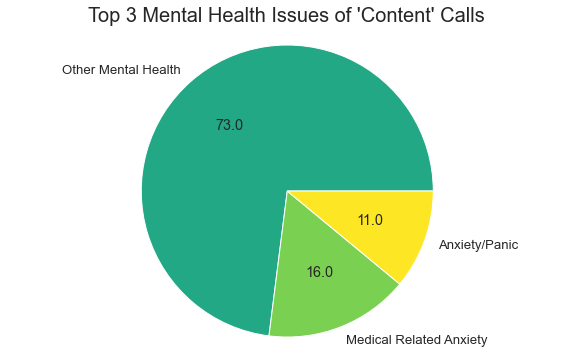

In [187]:
# DO NOT USE this exists solely for me to practice making a pie chart in plt
labels = 'Other Mental Health', 'Medical Related Anxiety', 'Anxiety/Panic'
sizes = np.array([73, 16, 11])
colors = ['#22a884', '#7ad151', '#fde725']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value)
plt.title("Top 3 Mental Health Issues of 'Content' Calls", fontsize=20)
plt.axis('equal');

In [175]:
conval = pd.DataFrame({'Issue':content_mh.index, 'Count':content_mh.values})
conval

,Issue,Count
0,Other Mental Health,280
1,Medical Related Anxiety,60
2,Anxiety/Panic,44
3,Depression ; Anxiety/Panic,24
4,Self-Esteem,20
5,Moral/Religious Issues,19
6,Depression,14
7,Anxiety/Panic; Other Mental Health,11
8,Moral/Religious Issues; Other Mental Health,10
9,Codependency,9


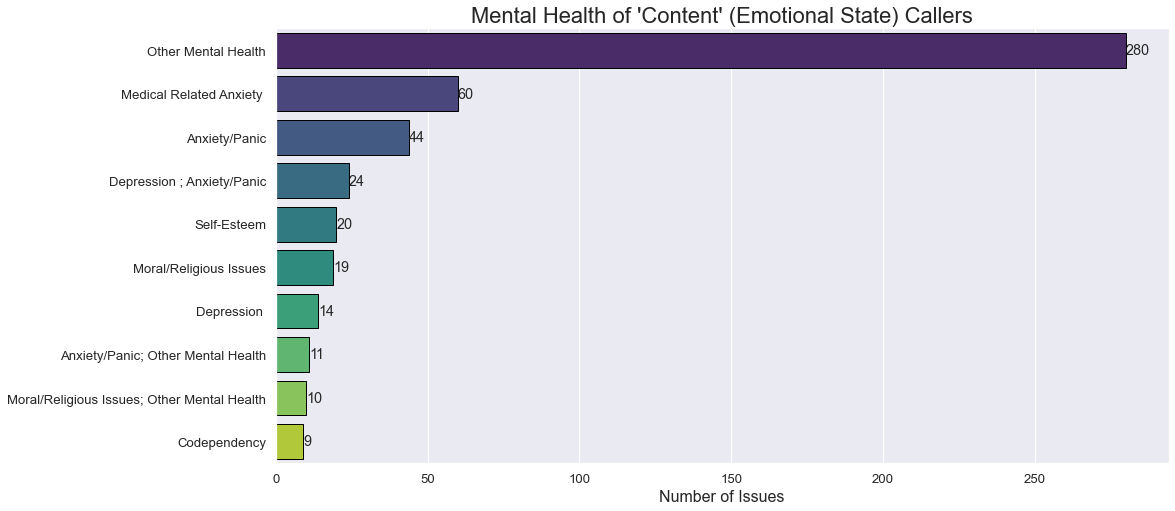

In [185]:
# Above plot but in seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
ax = sns.barplot(x=conval.Count, y=conval.Issue, data=conval,
            palette=sns.color_palette('viridis', n_colors=10), edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title("Mental Health of 'Content' (Emotional State) Callers", fontsize=22)
plt.xlabel('Number of Issues', fontsize=16)
plt.ylabel('');

In [ ]:
# Trying to help Maggie convert plt plot to sns plot:

# plt.subplots(figsize=(12,10))
# sns.set(style="whitegrid")
# sns.set(font_scale=1.2)
# y=finaldf['pctoccurence']
# x=finaldf['index']
# ax = sns.barplot(x=y, y=x, data=finaldf,
#             palette=sns.color_palette('viridis', n_colors=21), edgecolor='black')
# ax.bar_label(ax.containers[0])
# plt.title('CRISIS Abuse Issues Co-occuring with CRISIS Issue - Suicide', fontsize=15, fontstyle='oblique')
# plt.ylabel('Concern')
# plt.xlabel('% of SI Calls Issue Occured On');

## Investigating top Emotional State issues

In [129]:
# Melt test to extract individual issue values in the column, credit Maggie
emos = all_ci['CRISIS Issues - Emotional State'].str.split('; ', expand=True) # split with the space!
emos_issues = emos.melt().value.value_counts()
emos_issues

Anxious/Stressed         25962
Overwhelmed              14431
Lonely                   12511
Sad/Depressed            11355
Content                   5666
Anger/Hostility           4685
Bored                     4644
Illness/Health Stress     3858
Scared                    2826
Job Stress                2574
Emotional Abandonment     2193
Financial Stress          2054
Parenting Stress          1497
Embarrassed               1157
Guilty                     925
Moving Stress              829
School Stress              568
Caregiver Stress           447
Holiday Stress             221
Jealous                    203
Name: value, dtype: int64

In [130]:
# Extract top 4 into a df
tei_df = pd.DataFrame({'Issue':emos_issues.index, 'Count':emos_issues.values})
tei_df = tei_df[:5]
tei_df

,Issue,Count
0,Anxious/Stressed,25962
1,Overwhelmed,14431
2,Lonely,12511
3,Sad/Depressed,11355
4,Content,5666


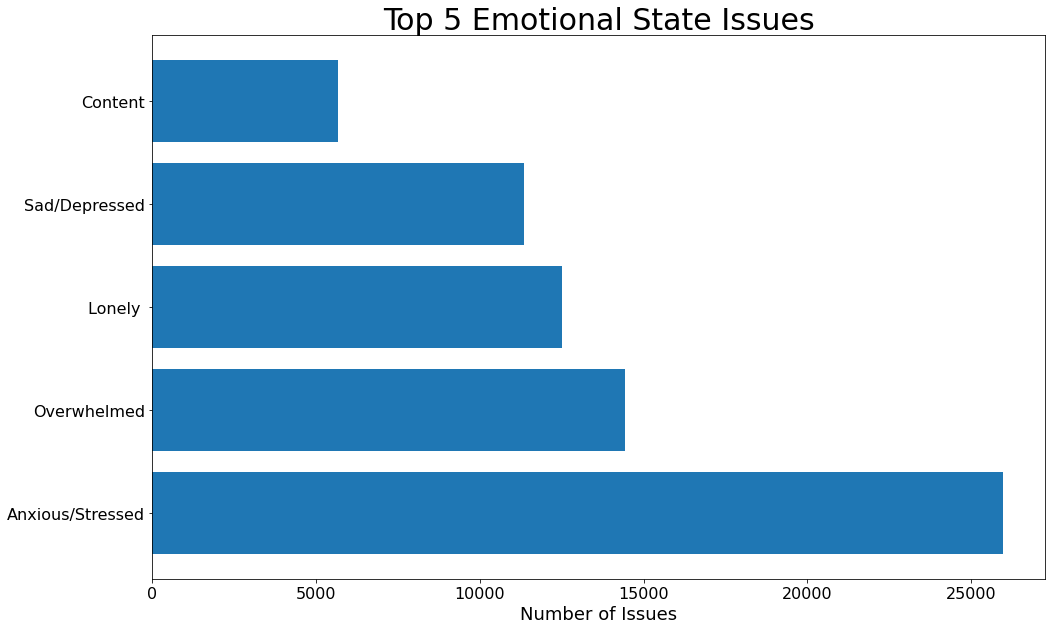

In [131]:
plt.figure(figsize=(16, 10))
plt.barh(tei_df.Issue, tei_df.Count)
plt.xticks(rotation = 0, fontsize=16)
plt.xlabel('Number of Issues', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Top 5 Emotional State Issues', fontsize=30);

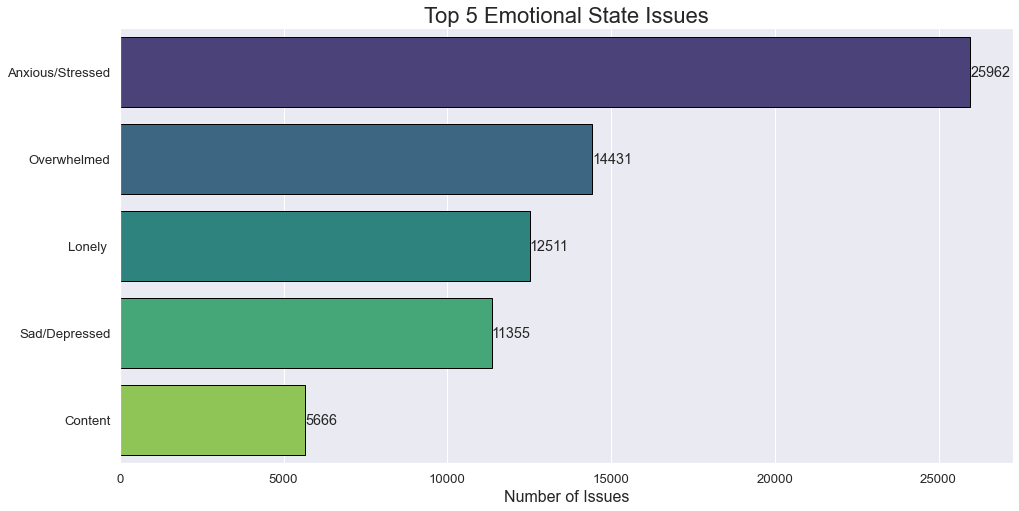

In [182]:
# Above plot but in seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
ax = sns.barplot(x=tei_df.Count, y=tei_df.Issue, data=tei_df,
            palette=sns.color_palette('viridis', n_colors=5), edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Emotional State Issues', fontsize=22)
plt.xlabel('Number of Issues', fontsize=16)
plt.ylabel('');